### Eigenstates of any 1D potential


$$H = -\frac{1}{2m}\left( \frac{d^2}{dx^2}\right) + V(x) = E\psi$$
$$\psi(0) = \psi(L) = 0$$
This is an example of regular sturm-liouville eigenstate problem. We have considered h = 1
$$-\frac{1}{2}\left( \frac{d^2}{dx^2}\right) + mV(x) = mE\psi$$
Substitute a dimensionless quantity y=x/L 
$$-\frac{1}{2}\left( \frac{d^2}{dy^2}\right) + m{L^2}V(y) = m{L^2}E\psi$$
$$\psi(y=0) = \psi(y=1) = 0$$
This makes problem easy just define m(L^2)V instead of V. 
* lets write the equation in decrete form
$$\left( \frac{d^2{f}}{dy^2}\right)_{x=j\Delta x} = \frac {f_{j+1}-2f{j}+f_{j-1}}{\Delta x^2}$$
$Here f_{j} = f(j\Delta x)$
After rewriting the equation and sone manipulation..
$$-\frac{1}{2\Delta y^2}\psi _{j+1}+\left(\frac{1}{\Delta y^2}+ m{L^2}V_{j}\right)\psi _{j} -\frac{1}{2\Delta y^2}\psi _{j-1} = m{L^2}E\psi _{j}$$

#### This is where we get Toeplitz matrix (Special kind of tridiagonal Matrix)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

Define N and dy

In [26]:
N = 2000
dy = 1/N
y = np.linspace(0, 1, N+1)

Define potential $mL^{2}V$

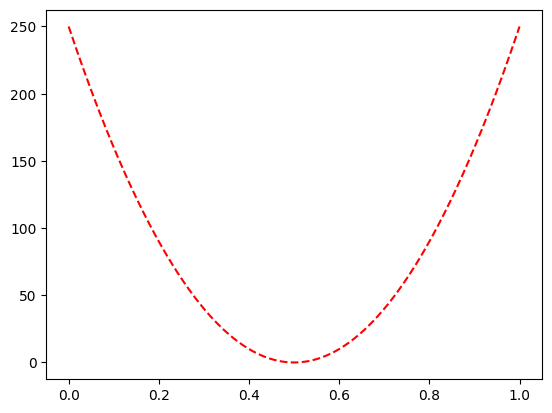

In [27]:
def mL2V(y):
    return 1000*(y-1/2)**2     #----> Change potential here to get corresponding eigen states

V = mL2V(y)

plt.plot(y,V, 'r--')

In [28]:
main_dia = 1/dy**2 + V[1:-1]
off_dia = -1/(2*dy**2) * np.ones(len(main_dia) - 1)

In [29]:
w, v = eigh_tridiagonal(main_dia, off_dia)
eigen_energy = w
eigen_func = v.T

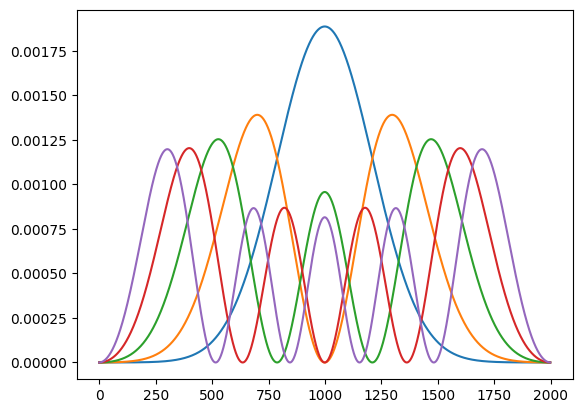

In [30]:
plt.plot(eigen_func[0]**2)
plt.plot(eigen_func[1]**2)
plt.plot(eigen_func[2]**2)
plt.plot(eigen_func[3]**2)
plt.plot(eigen_func[4]**2)


Text(0, 0.5, '$ mL^2 E/ \\hbar ^2 $')

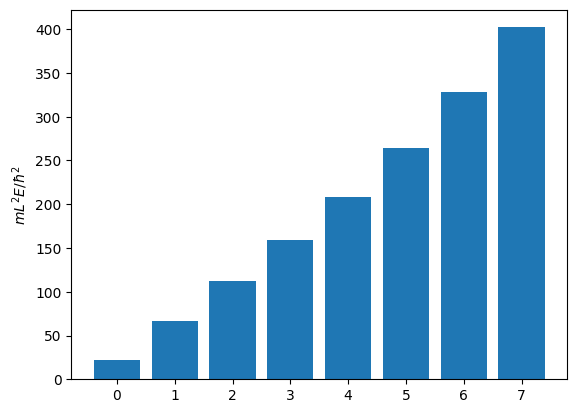

In [31]:
plt.bar(np.arange(0,8, 1), eigen_energy[0:8])
plt.ylabel("$ mL^2 E/ \\hbar ^2 $")